In [1]:
import sys
import os
sys.path.insert(0 ,'../granger-causality')

import numpy as np
import matplotlib.pyplot as plt
from simulations.synthetic import simulate_var, simulate_lorenz_96

data_path = '../data'
os.makedirs(data_path, exist_ok=True)

In [23]:
# Simulate Data
p = 10
T = 1000
delay = 0
lag = 3
# kernel = lambda x: - 2 + 1/2 * x**2
# k = 'sq'
kernel = None
k = 'none'


X_np, beta, GC = simulate_var(p=p, T=T, lag=lag, delay=delay, kernel=kernel, seed=0)
synth_name = f'var_p_{p}_T_{T}_lag_{lag}_d_{delay}_k_{k}_train.npz'
with open(os.path.join(data_path, synth_name), 'wb') as f:
    np.savez(f, X=X_np, lag=lag, delay=delay, GC=GC)
    
X_np, beta, GC = simulate_var(p=p, T=T, lag=lag, delay=delay, kernel=kernel, seed=1, GC=GC, beta=beta)
synth_name = f'var_p_{p}_T_{T}_lag_{lag}_d_{delay}_k_{k}_test.npz'
with open(os.path.join(data_path, synth_name), 'wb') as f:
    np.savez(f, X=X_np, lag=lag, delay=delay, GC=GC)

In [5]:
# Simulate Data
p = 20
F = 20
T = 1500


X_np, GC = simulate_lorenz_96(p, T, F, delta_t=0.1, sd=0.1, burn_in=1000, seed=0)
synth_name = f'lorenz_p_{p}_F_{F}_T_{T}_train.npz'
with open(os.path.join(data_path, synth_name), 'wb') as f:
    np.savez(f, X=X_np, GC=GC)
    
X_np, GC = simulate_lorenz_96(p, T, F, delta_t=0.1, sd=0.1, burn_in=1000, seed=1)
synth_name = f'lorenz_p_{p}_F_{F}_T_{T}_test.npz'
with open(os.path.join(data_path, synth_name), 'wb') as f:
    np.savez(f, X=X_np, GC=GC)

In [8]:
GC.shape

(20, 20)

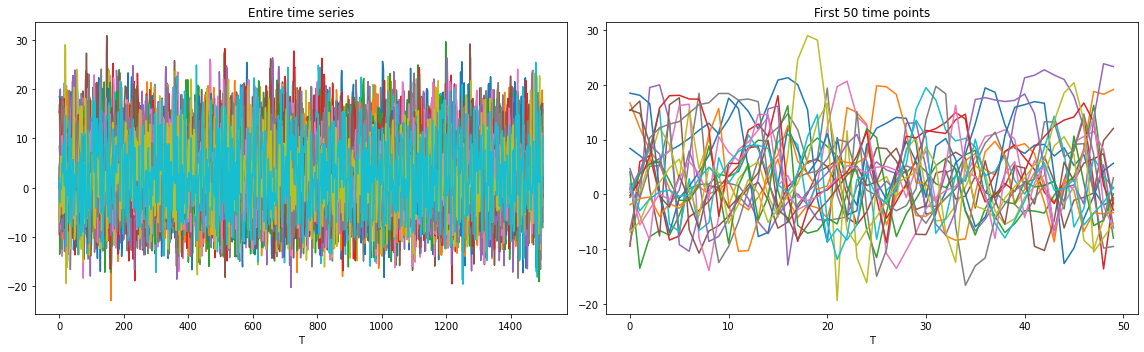

In [9]:
# Plot data
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))
axarr[0].plot(X_np)
axarr[0].set_xlabel('T')
axarr[0].set_title('Entire time series')
axarr[1].plot(X_np[:50])
axarr[1].set_xlabel('T')
axarr[1].set_title('First 50 time points')
plt.tight_layout()
plt.show()